<a href="https://colab.research.google.com/github/antonioalbanese/NetworkDynamicsAndLearning/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercise 1

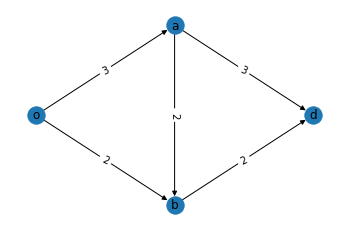

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
## creating and drawing the graph
nodes = ['o', 'a', 'b', 'd']
edges = [('o','a',{'capacity':3}), ('o','b',{'capacity':2}), ('a','b',{'capacity':2}), ('a','d',{'capacity':3}), ('b','d',{'capacity':2})]

G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
pos = {'o': (40, 20), 'a': (60, 35), 'b': (60, 5), 'd': (80, 20)}
labels = nx.get_edge_attributes(G,'capacity')

plt.subplot(111)
nx.draw_networkx_edge_labels(G, pos, edge_labels = labels)
nx.draw(G, pos, with_labels=True, font_weight='normal')

## Exercise 1.b

In [2]:
#trying to change on (b,d)
old = G['b']['d']['capacity']
G['b']['d']['capacity'] = old + 1
value, flows = nx.algorithms.flow.maximum_flow(G, 'o', 'd', capacity='capacity')
print("Adding 1 to (b,d) -> max_flow = {}".format(value))
#revert
G['b']['d']['capacity'] = old 

#trying to change on (o,a)
old = G['o']['a']['capacity']
G['o']['a']['capacity'] = old + 1
value, flows = nx.algorithms.flow.maximum_flow(G, 'o', 'd', capacity='capacity')
print("Adding 1 to (o,a) -> max_flow = {}".format(value))
#revert
G['o']['a']['capacity'] = old 

#trying to change on (a,d)
old = G['a']['d']['capacity']
G['a']['d']['capacity'] = old + 1
value, flows = nx.algorithms.flow.maximum_flow(G, 'o', 'd', capacity='capacity')
print("Adding 1 to (a,d) -> max_flow = {}".format(value))
#revert
G['a']['d']['capacity'] = old 

#trying to change on (o,b)
old = G['o']['b']['capacity']
G['o']['b']['capacity'] = old + 1
value, flows = nx.algorithms.flow.maximum_flow(G, 'o', 'd', capacity='capacity')
print("Adding 1 to (o,b) -> max_flow = {}".format(value))
#revert
G['o']['b']['capacity'] = old 

Adding 1 to (b,d) -> max_flow = 5
Adding 1 to (o,a) -> max_flow = 5
Adding 1 to (a,d) -> max_flow = 5
Adding 1 to (o,b) -> max_flow = 5


*Cuts:*
- $U=\{o,b,a\},U^C=\{d\}$ -> $C_U = 5$
- $U=\{o,a\},U^C=\{b,d\}$ -> $C_U = 7$
- $U=\{o,b\},U^C=\{a,d\}$ -> $C_U = 5$
- $U=\{o\},U^C=\{a,b,d\}$ -> $C_U = 5$

There are three mincuts, whose capacity is 5. 
- For the mincut $U=\{o,b,a\},U^C=\{d\}$,
$$
C_U = c(b,d) + c(a,d)
$$ 
- For the mincut $U=\{o,b\},U^C=\{a,d\}$,
$$
C_U = c(o,a) + c(b,d)
$$ 
- For the mincut $U=\{o\},U^C=\{a,b,d\}$,
$$
C_U = c(o,a) + c(o,b)
$$ 

Indipendently from where we apply one more unit of capacity the max throughput cannot be improved.





## Exercise 1.c

In [8]:
#trying to change on (b,d)
old1 = G['b']['d']['capacity']
G['b']['d']['capacity'] = old1 + 1
old2 = G['o']['b']['capacity']
G['o']['b']['capacity'] = old2 + 1
value, flows = nx.algorithms.flow.maximum_flow(G, 'o', 'd', capacity='capacity')
print("Adding 1 to (b,d) and 1 to (o,b) -> max_flow = {}".format(value))
#revert
G['b']['d']['capacity'] = old1
G['o']['b']['capacity'] = old2


Adding 1 to (b,d) and 1 to (o,b) -> max_flow = 6


*Cuts:*
- $U=\{o,b,a\},U^C=\{d\}$ -> $C_U = 5$
- $U=\{o,a\},U^C=\{b,d\}$ -> $C_U = 7$
- $U=\{o,b\},U^C=\{a,d\}$ -> $C_U = 5$
- $U=\{o\},U^C=\{a,b,d\}$ -> $C_U = 5$

There are three mincuts, whose capacity is 5. \\
The optimum solution is to distribute de 2 units of capacity to be added. 

- For the mincut $U=\{o,b,a\},U^C=\{d\}$,
$$
C_U = c(b,d) + c(a,d) = 2 + 3
$$ 
- For the mincut $U=\{o,b\},U^C=\{a,d\}$,
$$
C_U = c(o,a) + c(b,d) = 3 + 2
$$ 
- For the mincut $U=\{o\},U^C=\{a,b,d\}$,
$$
C_U = c(o,a) + c(o,b) = 3 + 2
$$ 

Adding 1 unit on $(b,d)$ and 1 unit on $(o,b)$ makes the maximum flow equals to 6.
While other combinations on't change the maximum flow. 


## Exercise 1.d

In [9]:
def remake_cut():
  global min_cut
  global edges
  cut1 = edges['bd'] + edges['ad']
  cut2 = edges['ob'] + edges['ab'] + edges['ad']
  cut3 = edges['oa'] + edges['bd']
  cut4 = edges['oa'] + edges['ob']
  min_c = min(cut1, cut2, cut3, cut4)
  tmp = edges.copy()
  if min_c > min_cut:
    optimal_cuts.pop(min_cut, None)
    optimal_edges.pop(min_cut, None)
    min_cut = min_c

  if min_cut not in optimal_cuts:
    optimal_cuts[min_cut] = [tuple([cut1, cut2, cut3, cut4])]
    optimal_edges[min_cut] = [tmp]
  else:
    optimal_cuts[min_cut].append(tuple([cut1, cut2, cut3, cut4]))
    optimal_edges[min_cut].append(tmp)

def compute(to_add):
  global edges
  for el in edges:
    if to_add == 0:
      #print(edges)
      remake_cut()
      #check(edges)
      return
    else:
      edges[el] = edges[el]+1
      compute(to_add-1)
    edges[el] = edges[el]-1  


In [10]:
min_cut = 0
to_add = 4
optimal_cuts = {
    0:[]
}
optimal_edges = {
    0:[]
}
edges = dict({
  'bd' : 2,
  'ad' : 3,
  'ob' : 2,
  'ab' : 2,
  'oa' : 3
})

compute(to_add)

sums = optimal_cuts[max(optimal_cuts.keys())]
sums = [sum(el) for el in sums]
index = sums.index(max(sums))
optimal_set_of_edges = optimal_edges[max(optimal_cuts.keys())][index]
print("optimal edges: ",optimal_set_of_edges)
print("optimal cut: ", optimal_cuts[max(optimal_cuts.keys())][index])

optimal edges:  {'bd': 4, 'ad': 3, 'ob': 4, 'ab': 2, 'oa': 3}
optimal cut:  (7, 9, 7, 7)


*Cuts:*
- $U=\{o,b,a\},U^C=\{d\}$ -> $C_U = 5$ -> $C_U = c(b,d) + c(a,d) = 2 + 3$ 
- $U=\{o,a\},U^C=\{b,d\}$ -> $C_U = 7$ -> $C_U = c(o,b) + c(a,b) + c(a,d) = 2 + 2 + 3$ 
- $U=\{o,b\},U^C=\{a,d\}$ -> $C_U = 5$ -> $C_U = c(o,a) + c(b,d) = 3 + 2$
- $U=\{o\},U^C=\{a,b,d\}$ -> $C_U = 5$ -> $C_U = c(o,a) + c(o,b) = 3 + 2$ 


The max-throughput reachable adding 4 units of capacity is 7.
The max sum of the cut capacities among all combinations of optimum capacity distribution is 30. One of the configurations that gives this result is
$$ 
\begin{cases}
c(a,b) = 2 \rightarrow c(a,b) = 2 \\ 
c(a,d) = 3 \rightarrow c(a,d) = 3 \\ 
\bf{c(b,d) = 2 \rightarrow c(b,d) = 4} \\
c(o,a) = 3 \rightarrow c(o,a) = 3 \\ 
\bf{c(o,b) = 2 \rightarrow c(o,b) = 4} 
\end{cases}$$

that gives the following cuts: 
- $U=\{o,b,a\},U^C=\{d\}$ -> $C_U = c(b,d) + c(a,d) = 4 + 3 = 7$ 
- $U=\{o,a\},U^C=\{b,d\}$ -> $C_U = c(o,b) + c(a,b) + c(a,d) = 4 + 2 + 3 = 9$ 
- $U=\{o,b\},U^C=\{a,d\}$ -> $C_U = c(o,a) + c(b,d) = 3 + 4 = 7$ 
- $U=\{o\},U^C=\{a,b,d\}$ -> $C_U = c(o,a) + c(o,b) = 3 + 4 = 7$ 


In [11]:
#trying to change on (b,d) and (o,b)
old1 = G['b']['d']['capacity']
G['b']['d']['capacity'] = old1 + 2
old2 = G['o']['b']['capacity']
G['o']['b']['capacity'] = old2 + 2
value, flows = nx.algorithms.flow.maximum_flow(G, 'o', 'd', capacity='capacity')
print("Adding 2 to (b,d) and 2 to (o,b) -> max_flow = {}".format(value))
#revert
G['b']['d']['capacity'] = old1
G['o']['b']['capacity'] = old2

Adding 2 to (b,d) and 2 to (o,b) -> max_flow = 7


# Exercise 2

## Exercise 2.a

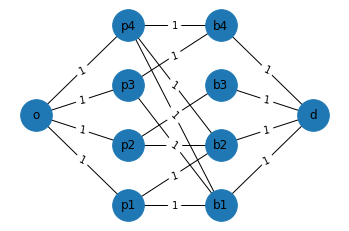

In [37]:
#creating and drawing the graph
BG = nx.Graph()
nodes = ['p1','p2','p3','p4','b1','b2','b3','b4']
edges = [('p1', 'b1',{'capacity': 1}), ('p1', 'b2',{'capacity': 1}), ('p2', 'b2',{'capacity': 1}), ('p2', 'b3',{'capacity': 1}), ('p3', 'b1',{'capacity': 1}), ('p3', 'b4',{'capacity': 1}), ('p4', 'b1',{'capacity': 1}), ('p4', 'b2',{'capacity': 1}), ('p4', 'b4',{'capacity': 1})]
BG.add_nodes_from(nodes)
BG.add_edges_from(edges)
BG.add_node('o')
BG.add_node('d')
BG.add_edges_from([('o','p1',{'capacity': 1}),('o','p2',{'capacity': 1}),('o','p3',{'capacity': 1}),('o','p4',{'capacity': 1}),('b1','d',{'capacity': 1}),('b2','d',{'capacity': 1}),('b3','d',{'capacity': 1}),('b4','d',{'capacity': 1})])
labels = nx.get_edge_attributes(BG,'capacity')
options = {
    'node_size': 1000,
    'width': 1, # width of the edges
}
pos = {'o':(0,50),'p1': (40, 20), 'p2': (40, 40), 'p3': (40, 60), 'p4': (40, 80), 'b1': (80, 20), 'b2': (80, 40), 'b3': (80, 60), 'b4': (80, 80),'d':(120,50)}
nx.draw_networkx_edge_labels(G, pos, edge_labels = labels)
nx.draw(BG, pos, **options, with_labels=True)


In [38]:
nx.algorithms.flow.maximum_flow(BG, 'o', 'd', capacity='capacity')

(4,
 {'b1': {'d': 1, 'p1': 0, 'p3': 0, 'p4': 0},
  'b2': {'d': 1, 'p1': 0, 'p2': 0, 'p4': 0},
  'b3': {'d': 1, 'p2': 0},
  'b4': {'d': 1, 'p3': 0, 'p4': 0},
  'd': {'b1': 0, 'b2': 0, 'b3': 0, 'b4': 0},
  'o': {'p1': 1, 'p2': 1, 'p3': 1, 'p4': 1},
  'p1': {'b1': 0, 'b2': 1, 'o': 0},
  'p2': {'b2': 0, 'b3': 1, 'o': 0},
  'p3': {'b1': 0, 'b4': 1, 'o': 0},
  'p4': {'b1': 1, 'b2': 0, 'b4': 0, 'o': 0}})

## Exercise 2.b

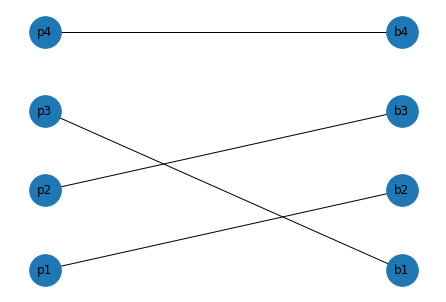

In [26]:
match = nx.bipartite.maximum_matching(BG)
new_edges = [(k,match[k]) for k in match]
new_G = nx.Graph()
new_G.add_nodes_from(nodes)
new_G.add_edges_from(new_edges)
nx.draw(new_G, pos, **options, with_labels=True)